In [93]:
import numpy as np
from michigrad.michigrad.visualize import show_graph
from michigrad.michigrad.engine import Value
from michigrad.michigrad.nn import Module, Neuron, Layer, MLP

In [94]:
np.random.seed(41)  
modelo = MLP(2,[2,1])
for layer in modelo.layers:
    for n in layer.neurons:
        n.nonlin = False


xs = [[0,0],[0,1],[1,0],[1,1]]
ys = [0,1 , 1, 0]
yHats = [modelo(x) for x in xs]
yHats

[Value(data=0.0, grad=0, name=),
 Value(data=0.012391480708295363, grad=0, name=),
 Value(data=0.4755880038544444, grad=0, name=),
 Value(data=0.48797948456273976, grad=0, name=)]

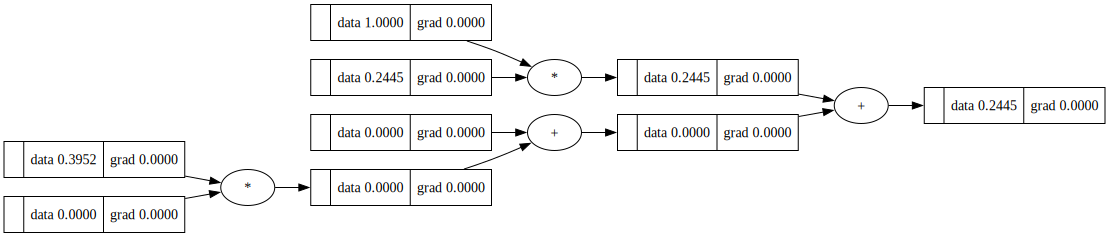

In [ ]:
show_graph(yHats[1])

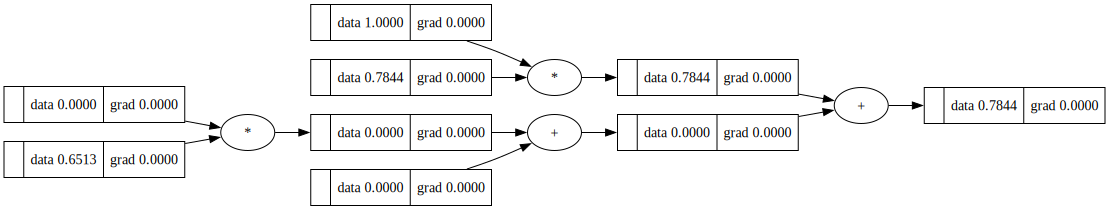

In [ ]:
show_graph(yHats[1])

In [95]:
lr = 0.01
step = 1000
resultados = []
for _ in range(step):
    yHats = [modelo(x) for x in xs]
    loss = sum([(y-yhat)**2 for y,yhat, in zip(ys, yHats)])/4
    for p in modelo.parameters():
        p.grad = 0
    
    loss.backward()
    resultados.append(loss.data)
    for p in modelo.parameters():
        p.data -= p.grad*lr

loss

Value(data=0.2506409856303169, grad=1, name=)

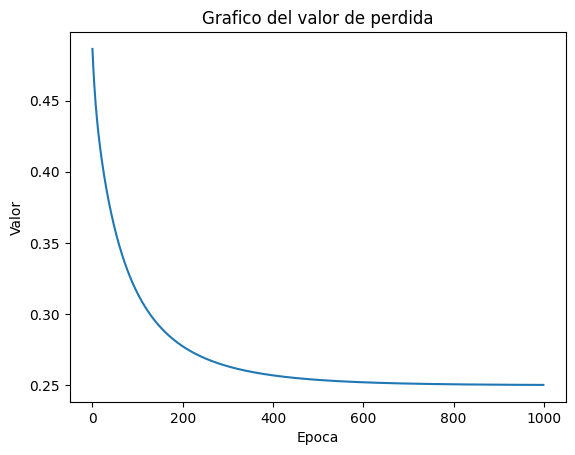

In [60]:
import matplotlib.pyplot as plt 

plt.plot(resultados)

plt.title("Grafico del valor de perdida")
plt.xlabel("Epoca")
plt.ylabel("Valor")

plt.show()


In [96]:
xs = [[0,0],[0,1],[1,0],[1,1]]
print(modelo(xs[0]),modelo(xs[1]),modelo(xs[2]),modelo(xs[3]))

Value(data=0.4684349900996405, grad=0, name=) Value(data=0.4774075895267703, grad=0, name=) Value(data=0.5179540044026312, grad=0, name=) Value(data=0.526926603829761, grad=0, name=)


In [63]:
print(len(modelo.parameters()))

9
